# Import Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind

url = 'https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv'
df = pd.read_csv(url)


In [6]:
# Get a list of all column headers
headers = list(df.columns)
print(headers)

['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_', 'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch', 'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury', 'SearchReason_AssistEscape', 'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId']


# Midterm - Research Question 1

## Visualizations

In [3]:
!pip install ydata-profiling

#EDA using pandas-profiling
from ydata_profiling import ProfileReport

# Produce and save the profiling report
profile = ProfileReport(df,title="Arrests and Strip Searches EDA Report")
profile.to_file("report.html")
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 57.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=b38b7eb8c1313653417c27cfacc39869e00551df572eba02690cf27ae50632a9
  Stored in directory: /root/.cache/pip/wheels/1d/05/04/c6d7d3b

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
prof

In [5]:
import plotly.express as px
#visualize as bar graph by sex by month for Strip search
fig1 = px.histogram(df, x="Arrest_Month", y="StripSearch", title="Male vs. Female Strip Search across All Month",
             color='Sex', barmode='group',
             height=400)
fig1.update_xaxes(categoryorder='array', categoryarray= ['Jan-Mar', 'Apr-June', 'July-Sept', 'Oct-Dec'])
fig1.show()

In [6]:
df1 = df[["Arrest_Year", 
          "Sex", 
          "StripSearch"]]

df1 = df1.groupby(['Sex', 'StripSearch']).agg({'StripSearch': ['sum','count']})
df1.head(20)

StripSearch       
                        sum  count
Sex StripSearch                   
F   0                     0  11334
    1                  1283   1283
M   0                     0  46132
    1                  6518   6518
U   0                     0      9

In [7]:
import plotly.express as px
fig2 = px.histogram(df, x="Arrest_Month", y="ArrestID", title="Female Vs Male Arrest Over Month",
             color='Sex', barmode='group', histfunc = "count",
             height=400)
fig2.update_layout(
    xaxis_title_text='Arrest Month', # xaxis label
    yaxis_title_text='Arrest Count', # yaxis label
)
fig2.update_xaxes(categoryorder='array', categoryarray= ['Jan-Mar', 'Apr-June', 'July-Sept', 'Oct-Dec'])
fig2.show()

In [8]:
df2 = df[["ArrestID", 
          "Sex", 
          "StripSearch"]]

df2 = df2.groupby(['Sex', 'StripSearch']).agg({'StripSearch': ['sum','count']})
df2.head(20)

StripSearch       
                        sum  count
Sex StripSearch                   
F   0                     0  11334
    1                  1283   1283
M   0                     0  46132
    1                  6518   6518
U   0                     0      9

In [9]:
from plotly import graph_objects as go

fig3 = go.Figure()

fig3.add_trace(go.Funnel(
    name = 'Male',
    y = ["Total Arrest", "Total Strip Search"],
    x = [52650, 6518],
    textinfo = "value+percent initial"))

fig3.add_trace(go.Funnel(
    name = 'Female',
    orientation = "h",
    y = ["Total Arrest", "Total Strip Search"],
    x = [12617, 1283],
    textposition = "inside",
    textinfo = "value+percent previous"))

# set the title of the chart
fig3.update_layout(title="Female vs. Male total arrest with Total Strip Search")

fig3.show()

In [10]:
df3 = df.groupby(['Sex']).agg({'ArrestID': ['count']})
df3.head(20)

ArrestID
       count
Sex         
F      12542
M      52256
U          9

## T-test

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

#Create df4 for Jan-Mar
df4 = df[df["Arrest_Month"].str.contains("Jan-Mar")][["Arrest_Month", "Sex", "StripSearch"]]

#t-test1 for RQ1
# Split data into two groups
group1 = df4.loc[df["Sex"] == "F", "StripSearch"]
group2 = df4.loc[df["Sex"] == "M", "StripSearch"]

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2)

# Print results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: The means of the two groups are significantly different.")
else:
    print("Fail to reject null hypothesis: There is not enough evidence to conclude that the means of the two groups are different.")


t-statistic: -3.194352686331835
p-value: 0.0014039157660482504
Reject null hypothesis: The means of the two groups are significantly different.


In [12]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

#Create df4 for Apr-June
df5 = df[df["Arrest_Month"].str.contains("Apr-June")][["Arrest_Month", "Sex", "StripSearch"]]

#t-test1 for RQ1
# Split data into two groups
group1 = df5.loc[df["Sex"] == "F", "StripSearch"]
group2 = df5.loc[df["Sex"] == "M", "StripSearch"]

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2)

# Print results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: The means of the two groups are significantly different.")
else:
    print("Fail to reject null hypothesis: There is not enough evidence to conclude that the means of the two groups are different.")

t-statistic: -5.764445755134285
p-value: 8.351787360000213e-09
Reject null hypothesis: The means of the two groups are significantly different.


In [13]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

#Create df4 for July-Sept
df6 = df[df["Arrest_Month"].str.contains("July-Sept")][["Arrest_Month", "Sex", "StripSearch"]]

#t-test1 for RQ1
# Split data into two groups
group1 = df6.loc[df["Sex"] == "F", "StripSearch"]
group2 = df6.loc[df["Sex"] == "M", "StripSearch"]

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2)

# Print results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: The means of the two groups are significantly different.")
else:
    print("Fail to reject null hypothesis: There is not enough evidence to conclude that the means of the two groups are different.")

t-statistic: -4.5804355197644275
p-value: 4.6734838605815446e-06
Reject null hypothesis: The means of the two groups are significantly different.


In [14]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

#Create df4 for Oct-Dec
df7 = df[df["Arrest_Month"].str.contains("Oct-Dec")][["Arrest_Month", "Sex", "StripSearch"]]

#t-test1 for RQ1
# Split data into two groups
group1 = df7.loc[df["Sex"] == "F", "StripSearch"]
group2 = df7.loc[df["Sex"] == "M", "StripSearch"]

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2)

# Print results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: The means of the two groups are significantly different.")
else:
    print("Fail to reject null hypothesis: There is not enough evidence to conclude that the means of the two groups are different.")

t-statistic: -0.6403933061883674
p-value: 0.5219262800514645
Fail to reject null hypothesis: There is not enough evidence to conclude that the means of the two groups are different.


## ANOVA & Tukey's HDS

In [15]:
import pandas as pd
import statsmodels.stats.multicomp as mc
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# create df to remove all data for Sex = U
df8 = df[df["Arrest_Month"].str.contains("M", "F")][["Arrest_Month", "Sex", "StripSearch"]]


# Fit a one-way ANOVA model
model = ols('StripSearch ~ Sex', data=df8).fit()
anova_results = anova_lm(model)

# Perform Tukey's HSD test
posthoc = mc.MultiComparison(df8[['StripSearch']], df8['Sex'])
tukey_results = posthoc.tukeyhsd()

# Print the ANOVA results and Tukey's HSD results
print(anova_results)


               df       sum_sq   mean_sq          F    PR(>F)
Sex           1.0     1.434810  1.434810  10.203889  0.001404
Residual  17611.0  2476.353755  0.140614        NaN       NaN


In [16]:
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     F      M   0.0222 0.0014 0.0086 0.0359   True
--------------------------------------------------


# Midterm - Research Question 2

## Data Preprocessing

In [17]:
# Check which attribute has null value
print(df.isnull().sum())

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [18]:
# Drop records with null age group since there are only a few null age group records
df = df.dropna(subset=['Age_group__at_arrest_'])

In [19]:
# Show the total number of records
print(df.shape[0])

65252


In [20]:
# Create a column 'Age' and combine values with the same meaning
df['Age'] = np.where(df['Age_group__at_arrest_'] == 'Aged 17 years and under', '17 and younger',
         np.where(df['Age_group__at_arrest_'] == 'Aged 17 years and younger', '17 and younger',
         np.where(df['Age_group__at_arrest_'] == 'Aged 18 to 24 years', '18 - 24',
         np.where(df['Age_group__at_arrest_'] == 'Aged 25 to 34 years', '25 - 34',
         np.where(df['Age_group__at_arrest_'] == 'Aged 35 to 44 years', '35 - 44',
         np.where(df['Age_group__at_arrest_'] == 'Aged 45 to 54 years', '45 - 54',
         np.where(df['Age_group__at_arrest_'] == 'Aged 55 to 64 years', '55 - 64',
         np.where(df['Age_group__at_arrest_'] == 'Aged 65 and older', '65 and older',
         np.where(df['Age_group__at_arrest_'] == 'Aged 65 years and older', '65 and older','')))))))))

<ipython-input-20-d19c475aaf6f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
# Create a column 'Youth' and combine values with the same meaning
df['Youth'] = np.where(df['Youth_at_arrest__under_18_years'] == 'Not a youth', 'Not a youth',
         np.where(df['Youth_at_arrest__under_18_years'] == 'Youth (aged 17 and younger)', 'Youth',
         np.where(df['Youth_at_arrest__under_18_years'] == 'Youth (aged 17 years and under)', 'Youth', '')))

<ipython-input-21-6eee497c2976>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
# Check the dataset
df.head()

Arrest_Year Arrest_Month  EventID   ArrestID  PersonID     Perceived_Race  \
0         2020    July-Sept  1005907  6017884.0    326622              White   
1         2020    July-Sept  1014562  6056669.0    326622              White   
2         2020      Oct-Dec  1029922  6057065.0    326622  Unknown or Legacy   
3         2021      Jan-Mar  1052190  6029059.0    327535              Black   
4         2021      Jan-Mar  1015512  6040372.0    327535        South Asian   

  Sex Age_group__at_arrest_ Youth_at_arrest__under_18_years ArrestLocDiv  ...  \
0   M   Aged 35 to 44 years                     Not a youth           54  ...   
1   M   Aged 35 to 44 years                     Not a youth           54  ...   
2   M   Aged 35 to 44 years                     Not a youth           54  ...   
3   M   Aged 25 to 34 years                     Not a youth           XX  ...   
4   M   Aged 25 to 34 years                     Not a youth           XX  ...   

   Actions_at_arrest___Assaulted_o  Actions_at_arrest___Cooperative  \
0                                0                                1   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

  SearchReason_CauseInjury  SearchReason_AssistEscape  \
0                      NaN                        NaN   
1                      NaN                        NaN   
2                      NaN                        NaN   
3                      NaN                        NaN   
4                      NaN                        NaN   

   SearchReason_PossessWeapons  SearchReason_PossessEvidence  ItemsFound  \
0                          NaN                           NaN         NaN   
1                          NaN                           NaN         NaN   
2                          NaN                           NaN         NaN   
3                          NaN                           NaN         NaN   
4                          NaN                           NaN         NaN   

   ObjectId      Age        Youth  
0         1  35 - 44  Not a youth  
1         2  35 - 44  Not a youth  
2         3  35 - 44  Not a youth  
3         4  25 - 34  Not a youth  
4         5  25 - 34  Not a youth  

[5 rows x 27 columns]

## Visualizations

Booked VS Youth

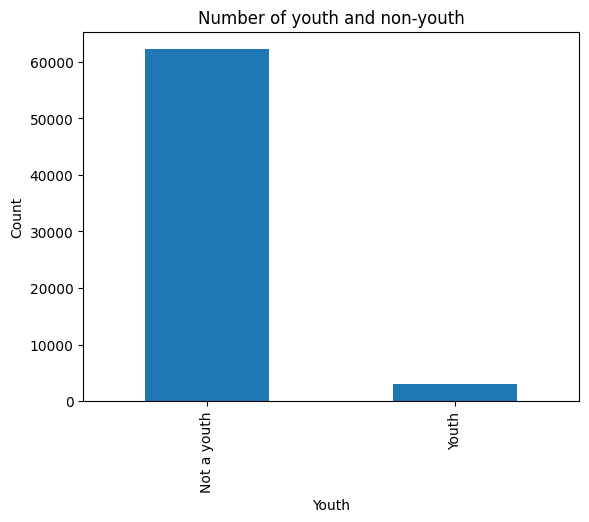

In [23]:
df['Youth'].value_counts().plot(kind='bar')

plt.title('Number of youth and non-youth')
plt.xlabel('Youth')
plt.ylabel('Count')

plt.show()

In [24]:
table1 = pd.crosstab(df['Booked'], df['Youth'])

In [25]:
print(table1)

Youth   Not a youth  Youth
Booked                    
0             29533   1814
1             32677   1228


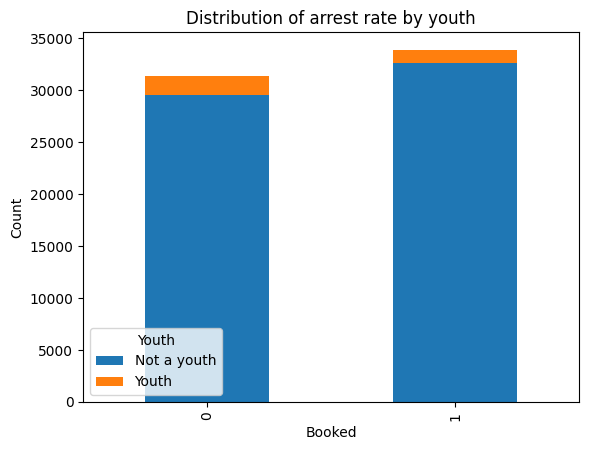

In [26]:
plot1 = table1.plot(kind='bar', stacked=True)
plot1.set_title('Distribution of arrest rate by youth')
plot1.set_ylabel('Count')
plt.show()

In [27]:
table2 = pd.crosstab(df['Youth'], df['Booked']).apply(lambda r: r/r.sum() * 100, axis=1)

In [28]:
print(table2)

Booked               0          1
Youth                            
Not a youth  47.473075  52.526925
Youth        59.631821  40.368179


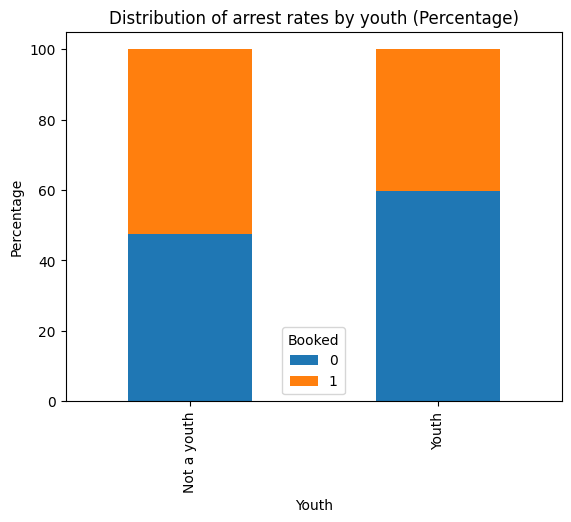

In [29]:
plot2 = table2.plot(kind='bar', stacked=True)
plot2.set_title('Distribution of arrest rates by youth (Percentage)')
plot2.set_ylabel('Percentage')
plt.show()

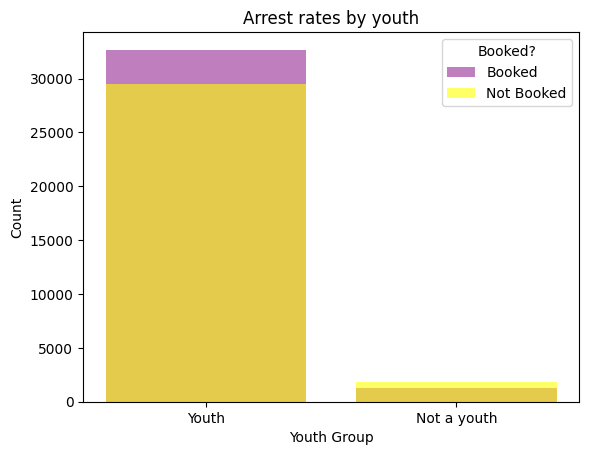

In [30]:
fig, ax = plt.subplots()

youth_group = ['Youth', 'Not a youth']

booked_count2 = df[df['Booked'] == 1]['Youth'].value_counts().sort_index()
not_booked_count2 = df[df['Booked'] == 0]['Youth'].value_counts().sort_index()

ax.bar(youth_group, booked_count2, alpha=0.5, color='purple', label='Booked')
ax.bar(youth_group, not_booked_count2, alpha=0.6, color='yellow', label='Not Booked')

ax.set_xlabel('Youth Group')
ax.set_ylabel('Count')
ax.set_title('Arrest rates by youth')

ax.legend(title='Booked?')

Booked VS Age

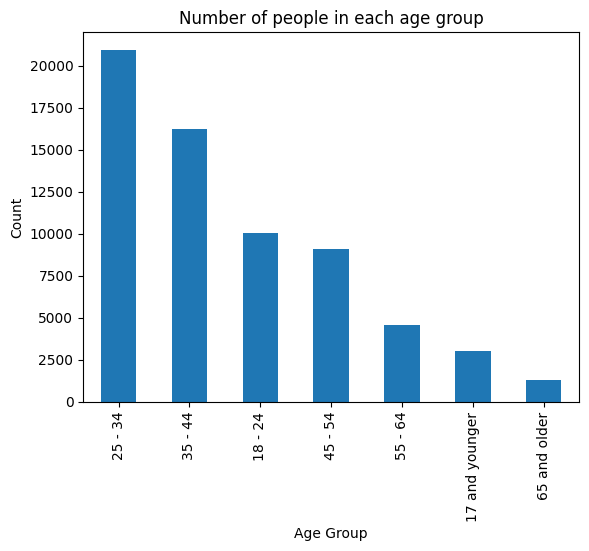

In [31]:
df['Age'].value_counts().plot(kind='bar')

plt.title('Number of people in each age group')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.show()

In [32]:
table3 = pd.crosstab(df['Age'], df['Booked'])

In [33]:
print(table3)

Booked             0      1
Age                        
17 and younger  1814   1228
18 - 24         4807   5234
25 - 34         9480  11469
35 - 44         7512   8730
45 - 54         4422   4644
55 - 64         2485   2105
65 and older     827    495


<Axes: xlabel='Age'>

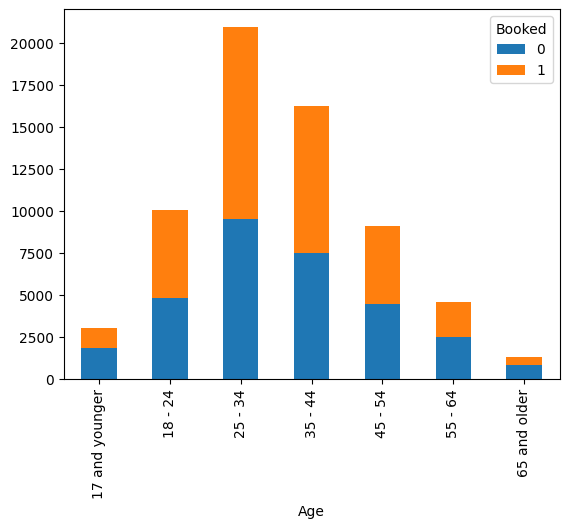

In [34]:
table3.plot(kind='bar', stacked=True)

In [35]:
table4 = pd.crosstab(df['Age'], df['Booked']).apply(lambda r: r/r.sum() * 100, axis=1)

In [36]:
print(table4)

Booked                  0          1
Age                                 
17 and younger  59.631821  40.368179
18 - 24         47.873718  52.126282
25 - 34         45.252757  54.747243
35 - 44         46.250462  53.749538
45 - 54         48.775645  51.224355
55 - 64         54.139434  45.860566
65 and older    62.556732  37.443268


<Axes: xlabel='Age'>

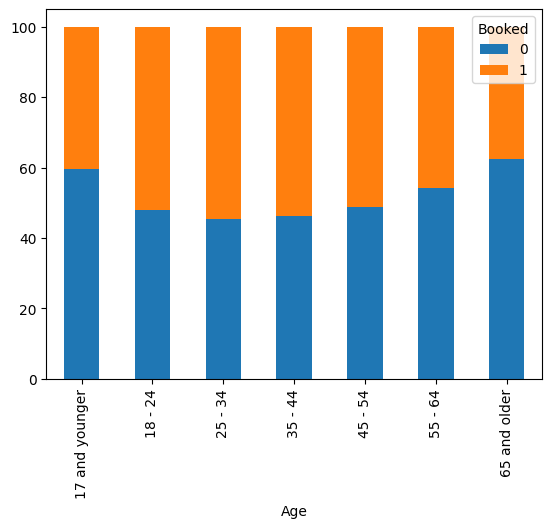

In [37]:
table4.plot(kind='bar', stacked=True)

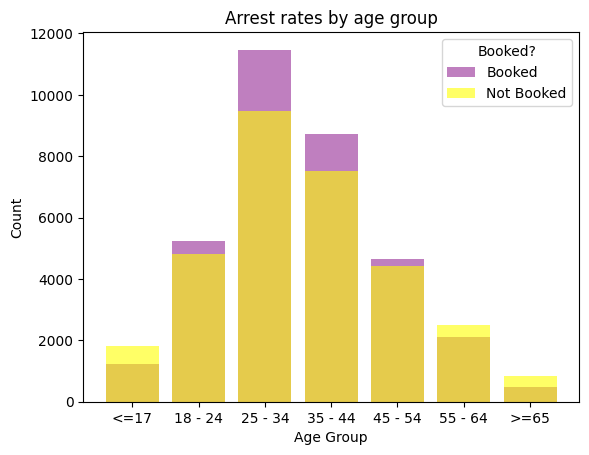

In [38]:
fig, ax = plt.subplots()

age_group = ['<=17', '18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '>=65']

booked_count = df[df['Booked'] == 1]['Age'].value_counts().sort_index()
not_booked_count = df[df['Booked'] == 0]['Age'].value_counts().sort_index()

ax.bar(age_group, booked_count, alpha=0.5, color='purple', label='Booked')
ax.bar(age_group, not_booked_count, alpha=0.6, color='yellow', label='Not Booked')

ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Arrest rates by age group')

ax.legend(title='Booked?')

## T-test

In [39]:
group_youth = df.loc[df['Youth'] == 'Youth', 'Booked']
group_notyouth = df.loc[df['Youth'] == 'Not a youth', 'Booked']

In [40]:
t_statistic, p_value = ttest_ind(group_youth, group_notyouth, equal_var=False)

In [41]:
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -13.33250828223915
p-value: 1.492891175480631e-39


In [42]:
group_2534 = df.loc[df['Age'] == '25 - 34', 'Booked']
group_3544 = df.loc[df['Age'] == '35 - 44', 'Booked']

In [43]:
t_statistic, p_value = ttest_ind(group_2534, group_3544, equal_var=False)

In [44]:
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: 1.9153617697970984
p-value: 0.05545454952532147


In [45]:
group_2534 = df.loc[df['Age'] == '25 - 34', 'Booked']
group_65 = df.loc[df['Age'] == '65 and older', 'Booked']

In [46]:
t_statistic, p_value = ttest_ind(group_2534, group_65, equal_var=False)

In [47]:
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: 12.582080069704146
p-value: 1.3732423394938452e-34


## One-way ANOVA & Tukey's HSD

One-Way ANOVA: Booked VS Age

In [48]:
# Dependent varibale: 'Booked'; Independent varibale: 'Age'
model2 = ols('Booked ~ Age', df).fit()

In [49]:
# One-way ANOVA test
anova_result2 = sm.stats.anova_lm(model2, typ=2)

In [50]:
# Show the test result
print(anova_result2)

                sum_sq       df          F        PR(>F)
Age         107.805412      6.0  72.452717  1.937452e-90
Residual  16180.124996  65245.0        NaN           NaN


In [51]:
# Tukey's HSD test
tukey_result2 = pairwise_tukeyhsd(endog=df['Booked'], groups=df['Age'], alpha=0.05)

In [52]:
# Show the test result
print(tukey_result2)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
17 and younger      18 - 24   0.1176    0.0  0.0872   0.148   True
17 and younger      25 - 34   0.1438    0.0  0.1153  0.1723   True
17 and younger      35 - 44   0.1338    0.0  0.1048  0.1628   True
17 and younger      45 - 54   0.1086    0.0  0.0778  0.1393   True
17 and younger      55 - 64   0.0549    0.0  0.0206  0.0893   True
17 and younger 65 and older  -0.0292 0.5596 -0.0776  0.0191  False
       18 - 24      25 - 34   0.0262 0.0003  0.0084   0.044   True
       18 - 24      35 - 44   0.0162  0.136 -0.0024  0.0349  False
       18 - 24      45 - 54   -0.009 0.8743 -0.0303  0.0123  False
       18 - 24      55 - 64  -0.0627    0.0 -0.0888 -0.0365   True
       18 - 24 65 and older  -0.1468    0.0 -0.1898 -0.1039   True
       25 - 34      35 - 44    -0.01 0.4693 -0.0253  0.0054  F

One-Way ANOVA: Booked VS Youth

In [53]:
# Dependent varibale: 'Booked'; Independent varibale: 'Youth'
model3 = ols('Booked ~ Youth', df).fit()

In [54]:
# One-way ANOVA test
anova_result3 = sm.stats.anova_lm(model3, typ=2)

In [55]:
# Show the test result
print(anova_result3)

                sum_sq       df           F        PR(>F)
Youth        42.874904      1.0  172.211631  2.728815e-39
Residual  16245.055504  65250.0         NaN           NaN


In [56]:
# Tukey's HSD test
tukey_result3 = pairwise_tukeyhsd(df['Booked'], df['Youth'], 0.05)

In [57]:
# Show the test result
print(tukey_result3)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1   group2 meandiff p-adj  lower   upper  reject
--------------------------------------------------------
Not a youth  Youth  -0.1216   0.0 -0.1397 -0.1034   True
--------------------------------------------------------


# Mid-term - Research Question 3

## Data Preprocessing

In [58]:
# Check which attribute has null value
print(df.isnull().sum())

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                  0
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57451
SearchReason_AssistEscape          57451
SearchReason_PossessWeapons        57451
SearchReason_PossessEvidence       57451
ItemsFound                         57451
ObjectId        

In [59]:
# Drop records with null race group since there are only a few null age group records
df = df.dropna(subset=['Perceived_Race'])

In [60]:
# Show the total number of records
print(df.shape[0])

65248


In [61]:
# Show the unique value of 'Perceived_Race'
print(df['Perceived_Race'].unique())

['White' 'Unknown or Legacy' 'Black' 'South Asian' 'Indigenous'
 'Middle-Eastern' 'Latino' 'East/Southeast Asian']


In [62]:
# Create a new column for People Of Color
df['POC'] = np.where(df['Perceived_Race'] == 'White', 'No',
         np.where(df['Perceived_Race'] == 'Unknown or Legacy', 'Yes',
         np.where(df['Perceived_Race'] == 'Black', 'Yes',
         np.where(df['Perceived_Race'] == 'South Asian', 'Yes',
         np.where(df['Perceived_Race'] == 'Indigenous', 'Yes',
         np.where(df['Perceived_Race'] == 'Middle-Eastern', 'Yes',
         np.where(df['Perceived_Race'] == 'Latino', 'Yes',
         np.where(df['Perceived_Race'] == 'East/Southeast Asian', 'Yes',''))))))))

<ipython-input-62-b02e7d14af99>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
# Check the dataset
df.head()

Arrest_Year Arrest_Month  EventID   ArrestID  PersonID     Perceived_Race  \
0         2020    July-Sept  1005907  6017884.0    326622              White   
1         2020    July-Sept  1014562  6056669.0    326622              White   
2         2020      Oct-Dec  1029922  6057065.0    326622  Unknown or Legacy   
3         2021      Jan-Mar  1052190  6029059.0    327535              Black   
4         2021      Jan-Mar  1015512  6040372.0    327535        South Asian   

  Sex Age_group__at_arrest_ Youth_at_arrest__under_18_years ArrestLocDiv  ...  \
0   M   Aged 35 to 44 years                     Not a youth           54  ...   
1   M   Aged 35 to 44 years                     Not a youth           54  ...   
2   M   Aged 35 to 44 years                     Not a youth           54  ...   
3   M   Aged 25 to 34 years                     Not a youth           XX  ...   
4   M   Aged 25 to 34 years                     Not a youth           XX  ...   

   Actions_at_arrest___Cooperative  SearchReason_CauseInjury  \
0                                1                       NaN   
1                                0                       NaN   
2                                0                       NaN   
3                                0                       NaN   
4                                0                       NaN   

  SearchReason_AssistEscape  SearchReason_PossessWeapons  \
0                       NaN                          NaN   
1                       NaN                          NaN   
2                       NaN                          NaN   
3                       NaN                          NaN   
4                       NaN                          NaN   

   SearchReason_PossessEvidence  ItemsFound  ObjectId      Age        Youth  \
0                           NaN         NaN         1  35 - 44  Not a youth   
1                           NaN         NaN         2  35 - 44  Not a youth   
2                           NaN         NaN         3  35 - 44  Not a youth   
3                           NaN         NaN         4  25 - 34  Not a youth   
4                           NaN         NaN         5  25 - 34  Not a youth   

   POC  
0   No  
1   No  
2  Yes  
3  Yes  
4  Yes  

[5 rows x 28 columns]

In [64]:
# Check the current data type
print(df.dtypes)

Arrest_Year                          int64
Arrest_Month                        object
EventID                              int64
ArrestID                           float64
PersonID                             int64
Perceived_Race                      object
Sex                                 object
Age_group__at_arrest_               object
Youth_at_arrest__under_18_years     object
ArrestLocDiv                        object
StripSearch                          int64
Booked                               int64
Occurrence_Category                 object
Actions_at_arrest___Concealed_i      int64
Actions_at_arrest___Combative__      int64
Actions_at_arrest___Resisted__d      int64
Actions_at_arrest___Mental_inst      int64
Actions_at_arrest___Assaulted_o      int64
Actions_at_arrest___Cooperative      int64
SearchReason_CauseInjury           float64
SearchReason_AssistEscape          float64
SearchReason_PossessWeapons        float64
SearchReason_PossessEvidence       float64
ItemsFound 

## Visualizations

StripSearch VS Race

In [65]:
table5 = pd.crosstab(df['Perceived_Race'], df['StripSearch'])

In [66]:
print(table5)

StripSearch               0     1
Perceived_Race                   
Black                 15084  2434
East/Southeast Asian   4071   341
Indigenous             1626   306
Latino                 1636   132
Middle-Eastern         3009   228
South Asian            3356   257
Unknown or Legacy      4519   536
White                 24147  3566


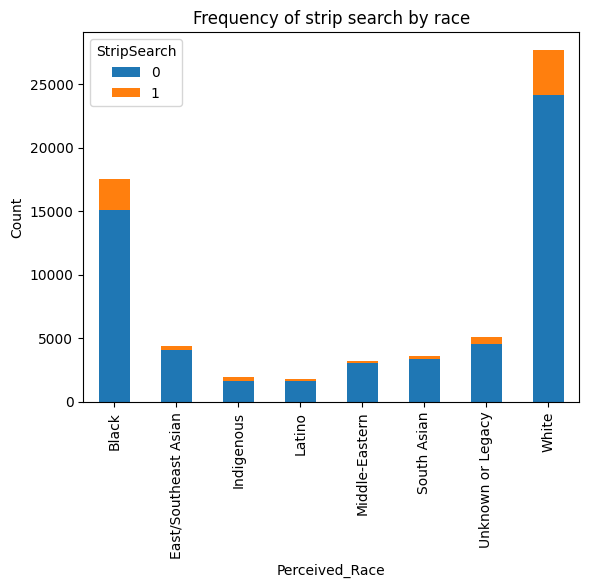

In [67]:
plot5 = table5.plot(kind='bar', stacked=True)
plot5.set_title('Frequency of strip search by race')
plot5.set_ylabel('Count')
plt.show()

In [68]:
table6 = pd.crosstab(df['Perceived_Race'], df['StripSearch']).apply(lambda r: r/r.sum() * 100, axis=1)

In [69]:
print(table6)

StripSearch                   0          1
Perceived_Race                            
Black                 86.105720  13.894280
East/Southeast Asian  92.271079   7.728921
Indigenous            84.161491  15.838509
Latino                92.533937   7.466063
Middle-Eastern        92.956441   7.043559
South Asian           92.886798   7.113202
Unknown or Legacy     89.396637  10.603363
White                 87.132393  12.867607


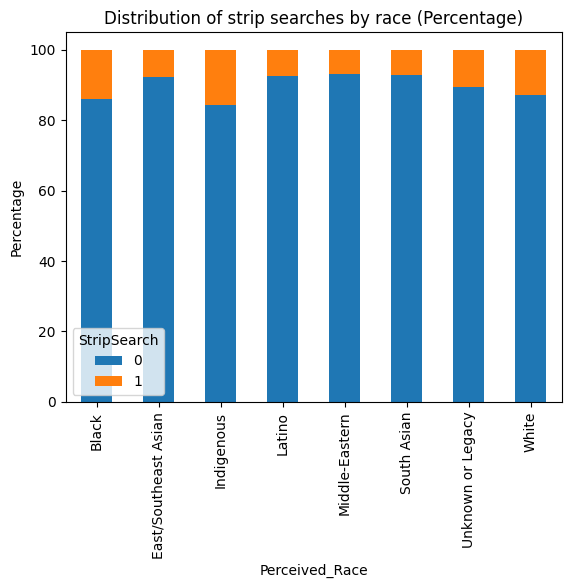

In [70]:
plot6 = table6.plot(kind='bar', stacked=True)
plot6.set_title('Distribution of strip searches by race (Percentage)')
plot6.set_ylabel('Percentage')
plt.show()

In [71]:
table7 = pd.crosstab(df['POC'], df['StripSearch'])

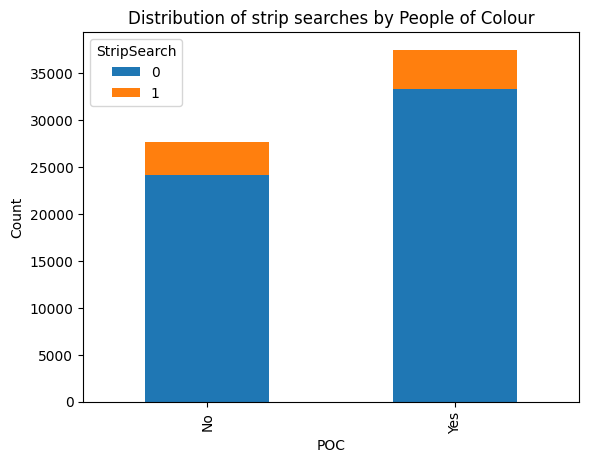

In [72]:
plot7 = table7.plot(kind='bar', stacked=True)
plot7.set_title('Distribution of strip searches by People of Colour')
plot7.set_ylabel('Count')
plt.show()

StripSearch VS Age

In [73]:
table8 = pd.crosstab(df['Age'], df['StripSearch'])

In [74]:
print(table8)

StripSearch         0     1
Age                        
17 and younger   2762   280
18 - 24          8691  1349
25 - 34         18177  2771
35 - 44         14144  2097
45 - 54          8160   905
55 - 64          4228   362
65 and older     1286    36


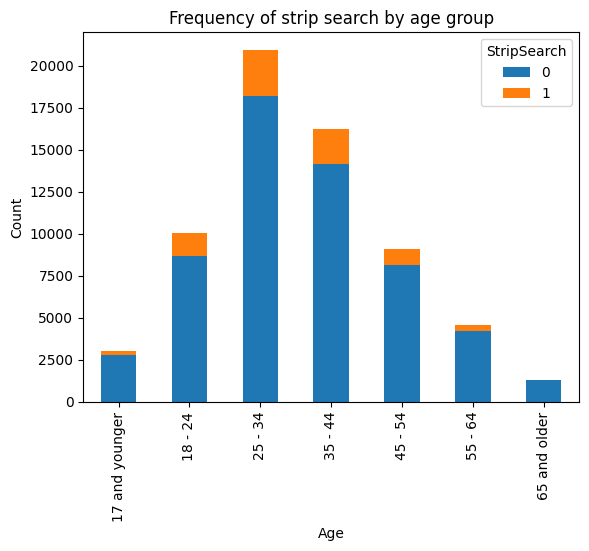

In [75]:
plot8 = table8.plot(kind='bar', stacked=True)
plot8.set_title('Frequency of strip search by age group')
plot8.set_ylabel('Count')
plt.show()

In [76]:
table9 = pd.crosstab(df['Age'], df['StripSearch']).apply(lambda r: r/r.sum() * 100, axis=1)

In [77]:
print(table9)

StripSearch             0          1
Age                                 
17 and younger  90.795529   9.204471
18 - 24         86.563745  13.436255
25 - 34         86.772007  13.227993
35 - 44         87.088233  12.911767
45 - 54         90.016547   9.983453
55 - 64         92.113290   7.886710
65 and older    97.276853   2.723147


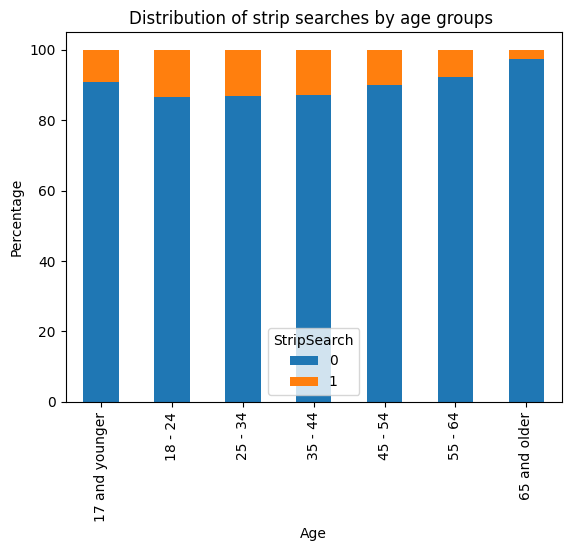

In [78]:
plot9 = table9.plot(kind='bar', stacked=True)
plot9.set_title('Distribution of strip searches by age groups ')
plot9.set_ylabel('Percentage')
plt.show()

StripSearch VS Age & Race

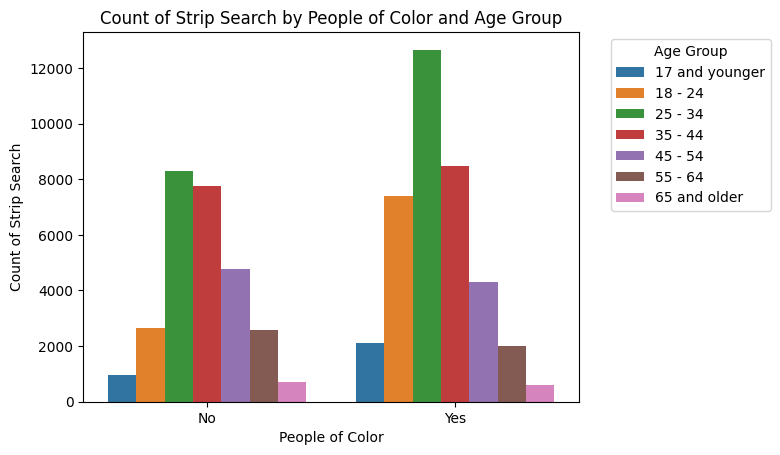

In [79]:
group1 = df.groupby(['POC', 'Age'])['StripSearch'].count().reset_index()

# Create a bar plot using Seaborn
sns.barplot(x='POC', y='StripSearch', hue='Age', data=group1)

# Add labels and title
plt.xlabel('People of Color')
plt.ylabel('Count of Strip Search')
plt.title('Count of Strip Search by People of Color and Age Group')
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

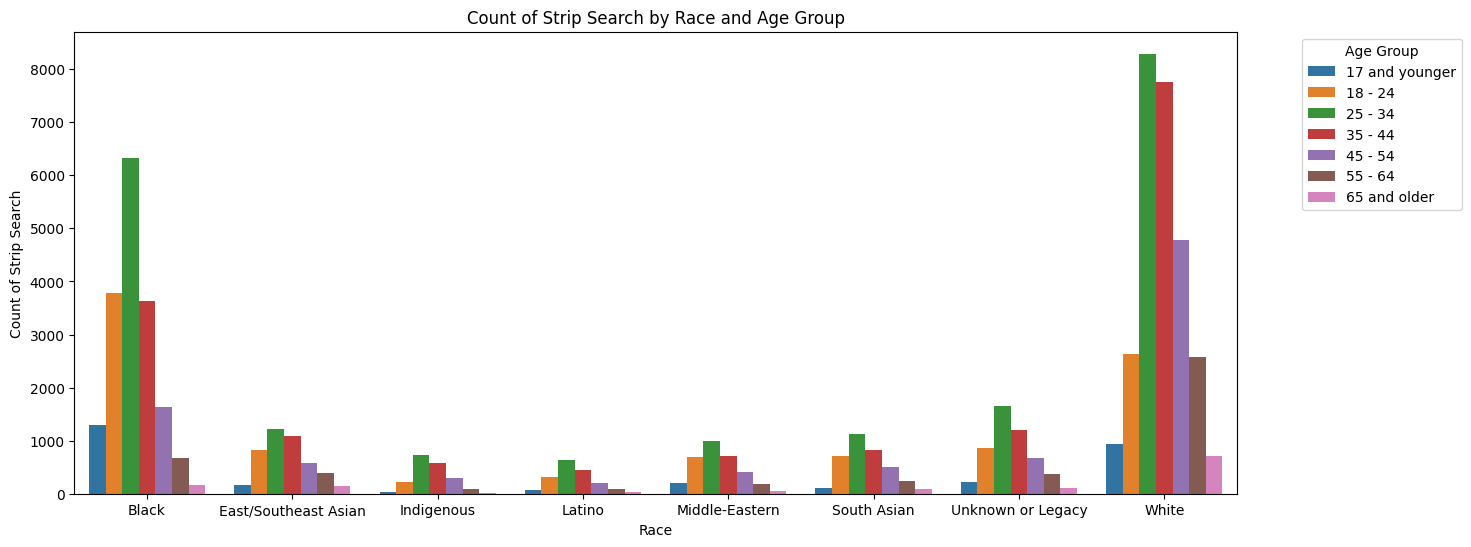

In [80]:
group2 = df.groupby(['Perceived_Race', 'Age'])['StripSearch'].count().reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='Perceived_Race', y='StripSearch', hue='Age', data=group2, ax=ax)
plt.xlabel('Race')
plt.ylabel('Count of Strip Search')
plt.title('Count of Strip Search by Race and Age Group')
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

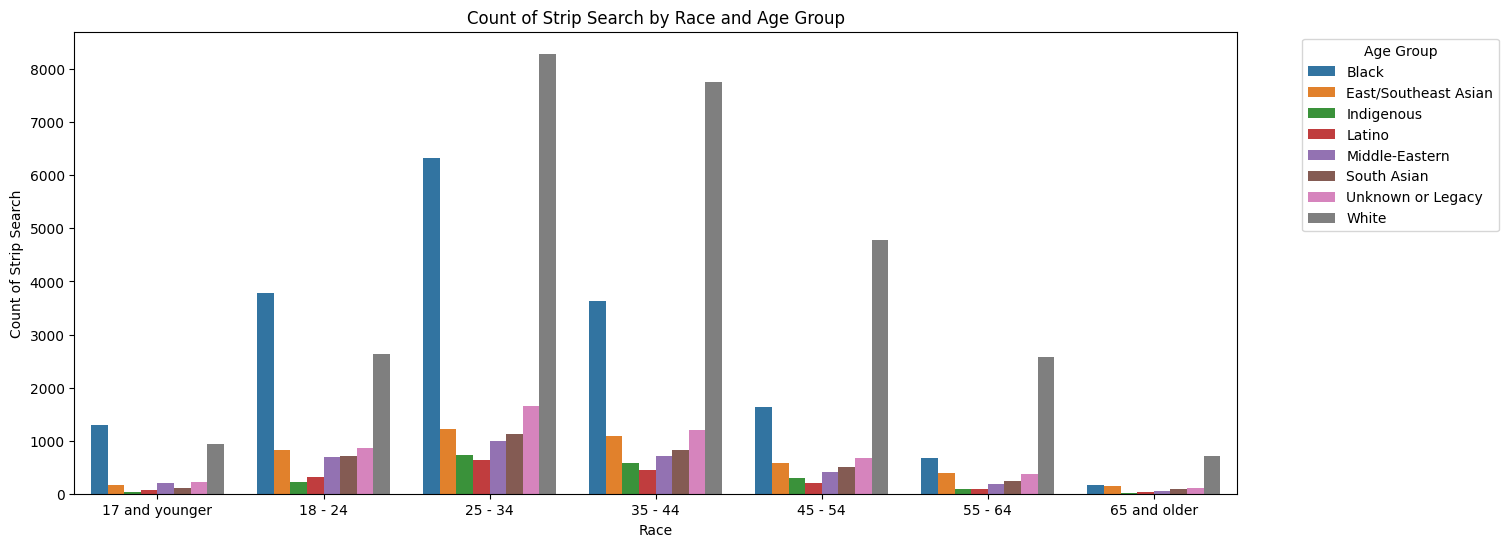

In [81]:
group3 = df.groupby(['Age', 'Perceived_Race'])['StripSearch'].count().reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='Age', y='StripSearch', hue='Perceived_Race', data=group3, ax=ax)
plt.xlabel('Race')
plt.ylabel('Count of Strip Search')
plt.title('Count of Strip Search by Race and Age Group')
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

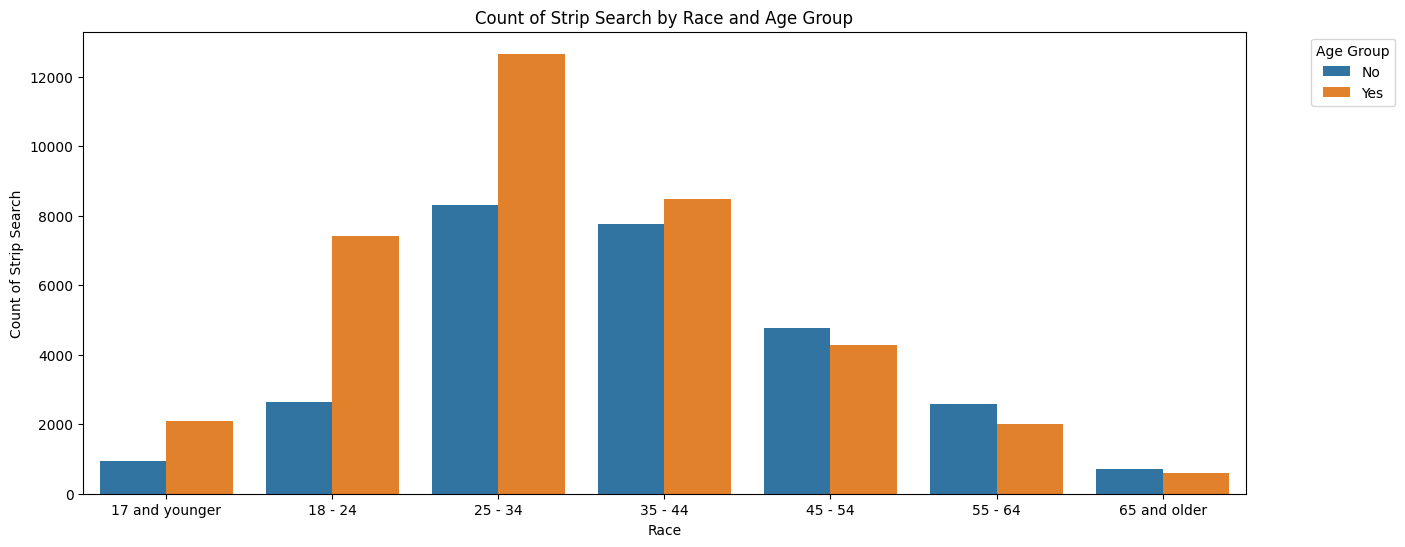

In [82]:
group4 = df.groupby(['Age', 'POC'])['StripSearch'].count().reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='Age', y='StripSearch', hue='POC', data=group4, ax=ax)
plt.xlabel('Race')
plt.ylabel('Count of Strip Search')
plt.title('Count of Strip Search by Race and Age Group')
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

## T-test

Strip Search & POC

In [83]:
group_colored = df.loc[df['POC'] == 'Yes', 'StripSearch']
group_notcolored = df.loc[df['POC'] == 'No', 'StripSearch']

In [84]:
t_statistic, p_value = ttest_ind(group_colored, group_notcolored, equal_var=False)

In [85]:
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -6.127370350390827
p-value: 8.991881959699504e-10


Strip Search & Black

In [86]:
group_black = df.loc[df['Perceived_Race'] == 'Black', 'StripSearch']
group_white = df.loc[df['Perceived_Race'] == 'White', 'StripSearch']

In [87]:
t_statistic, p_value = ttest_ind(group_black, group_white, equal_var=False)

In [88]:
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: 3.113181378896259
p-value: 0.0018522582147967232


Strip Search & Youth

In [89]:
group_youth2 = df.loc[df['Youth'] == 'Youth', 'StripSearch']
group_notyouth2 = df.loc[df['Youth'] == 'Not a youth', 'StripSearch']

In [90]:
t_statistic, p_value = ttest_ind(group_youth2, group_notyouth2, equal_var=False)

In [91]:
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -5.338693868278733
p-value: 9.970229086491259e-08


Strip Search & Elderly

In [92]:
group_elderly = df.loc[df['Age'] == '65 and older', 'StripSearch']
group_notelderly = df.loc[df['Age'] != '65 and older', 'StripSearch']

In [93]:
t_statistic, p_value = ttest_ind(group_elderly, group_notelderly, equal_var=False)

In [94]:
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -20.21617157748966
p-value: 7.582399768884021e-81


## Two-way ANOVA & Tukey's HSD

In [95]:
model4 = ols('StripSearch ~ Perceived_Race * Age', data=df).fit()

In [96]:
# Two-way ANOVA test
anova_result4 = sm.stats.anova_lm(model4, typ=2)

In [97]:
# Show the test result
print(anova_result4)

                         sum_sq       df          F        PR(>F)
Perceived_Race        39.840514      7.0  54.690597  1.970197e-78
Age                   31.159430      6.0  49.902698  1.523262e-61
Perceived_Race:Age    11.589455     42.0   2.651548  3.477303e-08
Residual            6784.354527  65192.0        NaN           NaN


In [98]:
# Tukey's HSD test
tukey_result4 = pairwise_tukeyhsd(endog=df['StripSearch'], groups=df['Perceived_Race'], alpha=0.05)

In [99]:
# Show the test result
print(tukey_result4)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian  -0.0617    0.0 -0.0782 -0.0451   True
               Black           Indigenous   0.0194 0.1922 -0.0041  0.0429  False
               Black               Latino  -0.0643    0.0 -0.0887 -0.0398   True
               Black       Middle-Eastern  -0.0685    0.0 -0.0873 -0.0497   True
               Black          South Asian  -0.0678    0.0 -0.0857 -0.0499   True
               Black    Unknown or Legacy  -0.0329    0.0 -0.0486 -0.0173   True
               Black                White  -0.0103 0.0226 -0.0197 -0.0008   True
East/Southeast Asian           Indigenous   0.0811    0.0  0.0543  0.1078   True
East/Southeast Asian               Latino  -0.0026    1.0 -0.0302   0.025  False
East/Southeast Asian       M

In [100]:
# Tukey's HSD test
tukey_result5 = pairwise_tukeyhsd(endog=df['StripSearch'], groups=df['Age'], alpha=0.05)

In [101]:
# Show the test result
print(tukey_result5)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
17 and younger      18 - 24   0.0423    0.0  0.0226  0.0621   True
17 and younger      25 - 34   0.0402    0.0  0.0217  0.0588   True
17 and younger      35 - 44   0.0371    0.0  0.0182  0.0559   True
17 and younger      45 - 54   0.0078 0.9129 -0.0122  0.0278  False
17 and younger      55 - 64  -0.0132 0.5881 -0.0355  0.0091  False
17 and younger 65 and older  -0.0648    0.0 -0.0963 -0.0334   True
       18 - 24      25 - 34  -0.0021 0.9984 -0.0137  0.0095  False
       18 - 24      35 - 44  -0.0052  0.863 -0.0174  0.0069  False
       18 - 24      45 - 54  -0.0345    0.0 -0.0484 -0.0207   True
       18 - 24      55 - 64  -0.0555    0.0 -0.0725 -0.0385   True
       18 - 24 65 and older  -0.1071    0.0 -0.1351 -0.0792   True
       25 - 34      35 - 44  -0.0032 0.9671 -0.0131  0.0068  F

#Final - Research Question 1

##Data Processing

In [9]:
# Drop records with null age group since there are only a few null age group records
df1 = df.dropna(subset=['Age_group__at_arrest_'])
# Create a column 'Age' and combine values with the same meaning
df1['Age'] = np.where(df1['Age_group__at_arrest_'] == 'Aged 17 years and under', '17',
         np.where(df1['Age_group__at_arrest_'] == 'Aged 17 years and younger', '17',
         np.where(df1['Age_group__at_arrest_'] == 'Aged 18 to 24 years', '18',
         np.where(df1['Age_group__at_arrest_'] == 'Aged 25 to 34 years', '25',
         np.where(df1['Age_group__at_arrest_'] == 'Aged 35 to 44 years', '35',
         np.where(df1['Age_group__at_arrest_'] == 'Aged 45 to 54 years', '45',
         np.where(df1['Age_group__at_arrest_'] == 'Aged 55 to 64 years', '55',
         np.where(df1['Age_group__at_arrest_'] == 'Aged 65 and older', '65',
         np.where(df1['Age_group__at_arrest_'] == 'Aged 65 years and older', '65','')))))))))

<ipython-input-9-228cfcb500fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = np.where(df1['Age_group__at_arrest_'] == 'Aged 17 years and under', '17',


In [10]:
columns_kept = ['Age', 'Perceived_Race', 'Sex','StripSearch']
df_lr = df1[columns_kept]
df_lr

Age     Perceived_Race Sex  StripSearch
0      35              White   M            0
1      35              White   M            0
2      35  Unknown or Legacy   M            0
3      25              Black   M            0
4      25        South Asian   M            0
...    ..                ...  ..          ...
65271  25         Indigenous   F            0
65272  35        South Asian   M            0
65273  45              White   F            0
65274  17  Unknown or Legacy   M            0
65275  18             Latino   M            0

[65252 rows x 4 columns]

In [11]:
print(df_lr.dtypes)

Age               object
Perceived_Race    object
Sex               object
StripSearch        int64
dtype: object


##Visualization

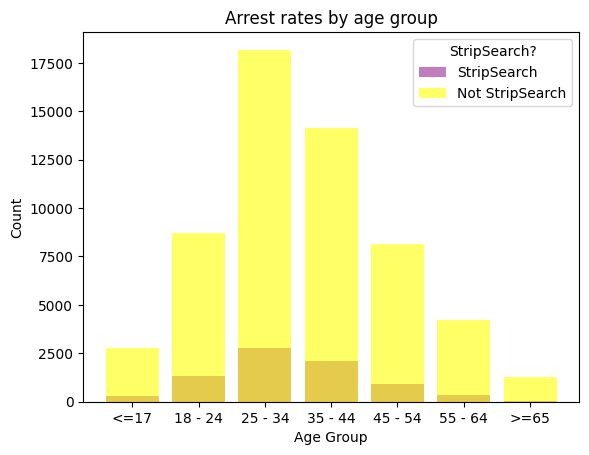

In [105]:
fig, ax = plt.subplots()

age_group = ['<=17', '18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '>=65']

booked_count = df1[df1['StripSearch'] == 1]['Age'].value_counts().sort_index()
not_booked_count = df1[df1['StripSearch'] == 0]['Age'].value_counts().sort_index()

ax.bar(age_group, booked_count, alpha=0.5, color='purple', label='StripSearch')
ax.bar(age_group, not_booked_count, alpha=0.6, color='yellow', label='Not StripSearch')

ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Arrest rates by age group')

ax.legend(title='StripSearch?')

In [106]:
table13 = pd.crosstab(df1['Age'], df1['StripSearch'])
print(table13)

StripSearch      0     1
Age                     
17            2762   280
18            8691  1349
25           18177  2771
35           14144  2097
45            8160   905
55            4228   362
65            1286    36


In [107]:
table14 = pd.crosstab(df1['Age'], df1['StripSearch']).apply(lambda r: r/r.sum() * 100, axis=1)
print (table14)

StripSearch          0          1
Age                              
17           90.795529   9.204471
18           86.563745  13.436255
25           86.772007  13.227993
35           87.088233  12.911767
45           90.016547   9.983453
55           92.113290   7.886710
65           97.276853   2.723147


In [108]:
table15 = pd.crosstab(df1['Perceived_Race'], df1['StripSearch'])
print(table15)

StripSearch               0     1
Perceived_Race                   
Black                 15084  2434
East/Southeast Asian   4071   341
Indigenous             1626   306
Latino                 1636   132
Middle-Eastern         3009   228
South Asian            3356   257
Unknown or Legacy      4519   536
White                 24147  3566


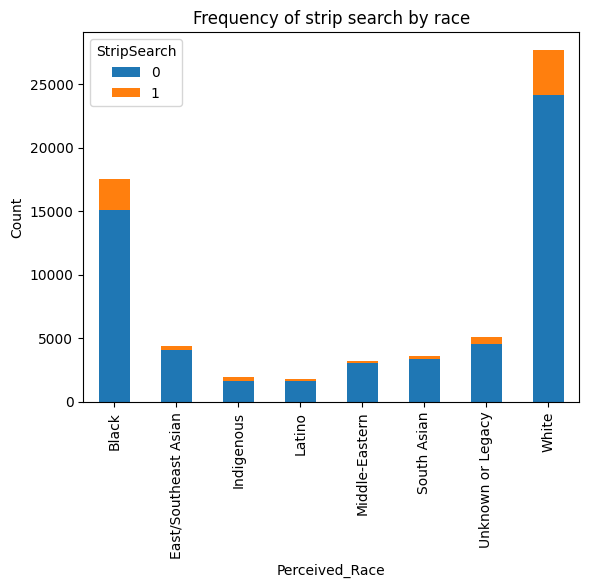

In [109]:
plot15 = table15.plot(kind='bar', stacked=True)
plot15.set_title('Frequency of strip search by race')
plot15.set_ylabel('Count')
plt.show()

In [110]:
from plotly import graph_objects as go

fig13 = go.Figure()

fig13.add_trace(go.Funnel(
    name = 'Male',
    y = ["Total Arrest", "Total Strip Search"],
    x = [52650, 6518],
    textinfo = "value+percent initial"))

fig13.add_trace(go.Funnel(
    name = 'Female',
    orientation = "h",
    y = ["Total Arrest", "Total Strip Search"],
    x = [12617, 1283],
    textposition = "inside",
    textinfo = "value+percent previous"))

# set the title of the chart
fig13.update_layout(title="Female vs. Male total arrest with Total Strip Search")

fig13.show()

##Logistic Regression

In [111]:
# Convert categorical variables to numerical values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in ['Age', 'Perceived_Race', 'Sex']:
    df_lr[column] = le.fit_transform(df_lr[column])

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X = df_lr.drop('StripSearch', axis=1)
y = df_lr['StripSearch']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Oversample minority class using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Fit logistic regression model on resampled training data
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)

# Predict target variable for testing data
y_pred = lr_model.predict(X_test)

# Evaluate model performance
from sklearn.metrics import accuracy_score, confusion_matrix

print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Calculate the f-1 score
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"F-1 score: {f1:.5f}")


<ipython-input-111-5c8d5e0efc30>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-111-5c8d5e0efc30>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-111-5c8d5e0efc30>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Accuracy score: 0.49256704980842914
Confusion matrix:
[[8218 8988]
 [ 945 1424]]
F-1 score: 0.22283


In [112]:
print(df_lr)

       Age  Perceived_Race  Sex  StripSearch
0        3               7    1            0
1        3               7    1            0
2        3               6    1            0
3        2               0    1            0
4        2               5    1            0
...    ...             ...  ...          ...
65271    2               2    0            0
65272    3               5    1            0
65273    4               7    0            0
65274    0               6    1            0
65275    1               3    1            0

[65248 rows x 4 columns]


In [113]:
# Compute performance metrics
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['No StripSearch', 'StripSearch'])
print(f"Classification report:\n{report}")

# Compute error rate
error_rate = (y_test != y_pred).mean()
print(f"Error rate: {error_rate}")

# Compute precision
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Compute recall
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Compute F1-score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")


Classification report:
                precision    recall  f1-score   support

No StripSearch       0.90      0.48      0.62     17206
   StripSearch       0.14      0.60      0.22      2369

      accuracy                           0.49     19575
     macro avg       0.52      0.54      0.42     19575
  weighted avg       0.80      0.49      0.57     19575

Error rate: 0.5074329501915709
Precision: 0.1367652708413369
Recall: 0.6010975094976784
F1-score: 0.22283076441592986


In [114]:
#ensuring my model is not overfitting
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_model, X, y, cv=5)
print("Cross-validation scores:", scores)


Cross-validation scores: [0.88045977 0.88045977 0.88045977 0.88045061 0.88045061]


In [115]:
import statsmodels.api as sm

# assuming you have X_test and y_test for your test data
# make predictions using the trained logistic regression model
y_pred = lr_model.predict(X_test)

# calculate the prediction interval using statsmodels
glm_model = sm.GLM(y_test, sm.add_constant(X_test), family=sm.families.Binomial())
glm_results = glm_model.fit()
#95% confidence level
pred_interval = glm_results.get_prediction(sm.add_constant(X_test)).summary_frame(alpha=0.05)

# calculate lower and upper bounds of the prediction interval
pred_interval['obs_ci_lower'] = pred_interval['mean_ci_lower'] - pred_interval['mean']
pred_interval['obs_ci_upper'] = pred_interval['mean_ci_upper'] - pred_interval['mean']

# print the prediction interval
print(pred_interval.head())


           mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
53222  0.103080  0.005415       0.092940       0.114186     -0.010140   
31070  0.121229  0.003499       0.114537       0.128255     -0.006692   
48326  0.118591  0.004236       0.110537       0.127148     -0.008054   
55254  0.134951  0.004010       0.127283       0.143005     -0.007668   
38471  0.108727  0.003839       0.101428       0.116483     -0.007299   

       obs_ci_upper  
53222      0.011107  
31070      0.007026  
48326      0.008557  
55254      0.008054  
38471      0.007756  


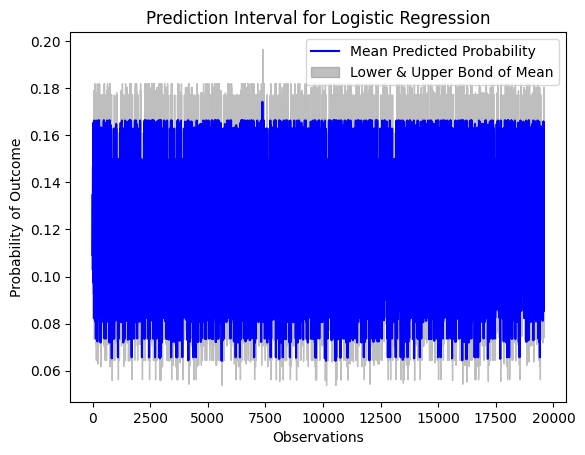

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Get the mean predicted probabilities and lower/upper bounds of the prediction interval
y_pred_mean = pred_interval['mean'].reset_index(drop = True)
y_pred_lower = pred_interval['mean_ci_lower']
y_pred_upper = pred_interval['mean_ci_upper']

# Create a plot of the mean predicted probabilities
plt.plot(y_pred_mean, color='blue', label='Mean Predicted Probability')

# Create shaded regions for the lower and upper bounds of the prediction interval
x = np.arange(len(y_pred_mean))
plt.fill_between(x, y_pred_lower, y_pred_upper, color='gray', alpha=0.5, label='Lower & Upper Bond of Mean')

# Set axis labels and title
plt.xlabel('Observations')
plt.ylabel('Probability of Outcome')
plt.title('Prediction Interval for Logistic Regression')
plt.legend()

# Show the plot
plt.show()


In [117]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# create some example data
X = np.random.randn(100, 2)
y = np.random.binomial(1, 0.5, 100)

# fit a logistic regression model
#lr_model = LogisticRegression().fit(X, y)

# calculate the odds ratios
odds_ratios = np.exp(lr_model.coef_)

print("Odds ratios:")
print(odds_ratios)


Odds ratios:
[[0.89782749 1.00704012 1.22412488]]


Optimization terminated successfully.
         Current function value: 0.690289
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            StripSearch   No. Observations:                80484
Model:                          Logit   Df Residuals:                    80480
Method:                           MLE   Df Model:                            3
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                0.004123
Time:                        16:47:35   Log-Likelihood:                -55557.
converged:                       True   LL-Null:                       -55787.
Covariance Type:            nonrobust   LLR p-value:                 2.142e-99
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0763      0.023      3.348      0.001       0.032       0.121
Age              

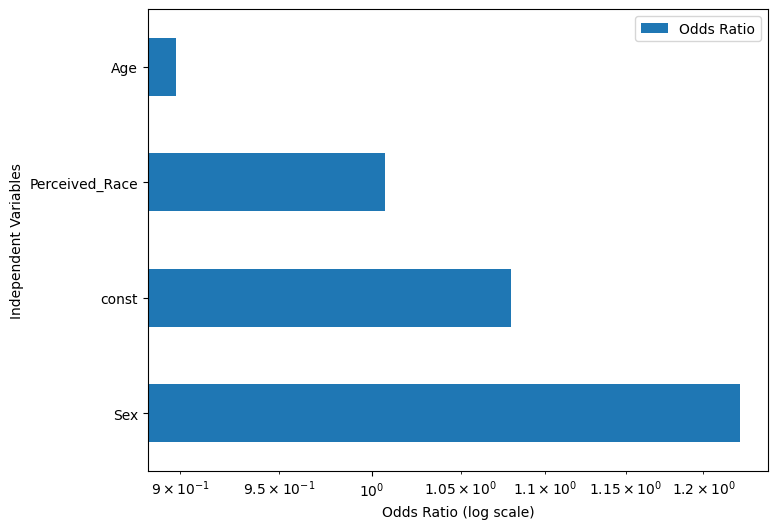

In [118]:
#confidence Interval
import statsmodels.api as sm

# Fit logistic regression model on training data using statsmodels
X_train_sm = sm.add_constant(X_train_resampled)  # add constant term for intercept
lr_model_sm = sm.Logit(y_train_resampled, X_train_sm).fit()

# Print summary of the model
print(lr_model_sm.summary())

# Predict target variable for testing data
X_test_sm = sm.add_constant(X_test)  # add constant term for intercept
y_pred_sm = lr_model_sm.predict(X_test_sm)

# Evaluate model performance
y_pred_binary = (y_pred_sm > 0.5).astype(int)  # convert probabilities to binary predictions
print(f"Accuracy score: {accuracy_score(y_test, y_pred_binary)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred_binary)}")

# Plot confidence intervals for coefficients
ci = lr_model_sm.conf_int()  # get confidence intervals for coefficients
ci['Odds Ratio'] = lr_model_sm.params  # add odds ratio column
ci.columns = ['2.5%', '97.5%', 'Odds Ratio']  # rename columns
ci = np.exp(ci)  # convert confidence intervals to odds ratios
ci = ci.sort_values(by='Odds Ratio', ascending=False)  # sort by odds ratio
ax = ci[['Odds Ratio']].plot(kind='barh', figsize=(8, 6))
ax.set_xlabel('Odds Ratio (log scale)')
ax.set_xscale('log')
ax.set_ylabel('Independent Variables')
plt.show()


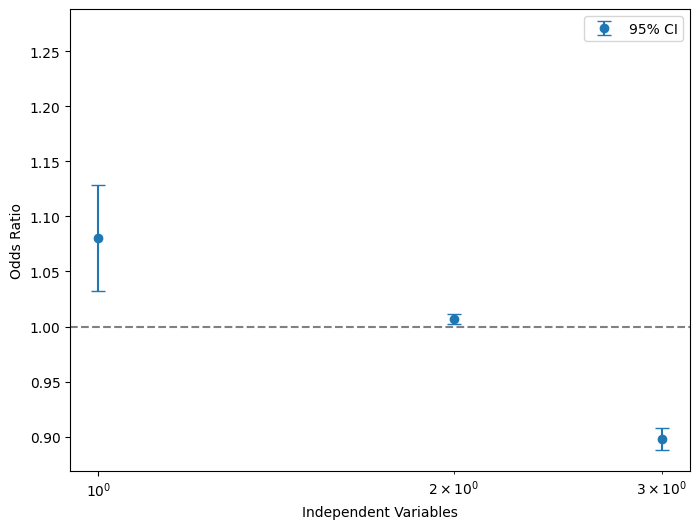

In [119]:
# Plot confidence intervals for coefficients
ci = lr_model_sm.conf_int()  # get confidence intervals for coefficients
ci['Odds Ratio'] = lr_model_sm.params  # add odds ratio column
ci.columns = ['2.5%', '97.5%', 'Odds Ratio']  # rename columns
ci = np.exp(ci)  # convert confidence intervals to odds ratios
ci = ci.sort_values(by='Odds Ratio', ascending=False)  # sort by odds ratio
ci = ci.drop(['Odds Ratio'], axis=1)  # drop odds ratio column

# Plot the confidence intervals
fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(ci.index, ci.mean(axis=1), yerr=(ci.iloc[:, 1] - ci.iloc[:, 0]) / 2, fmt='o', capsize=5, label='95% CI')
ax.axhline(y=1, color='gray', linestyle='--')
ax.set_ylabel('Odds Ratio')
ax.set_xlabel('Independent Variables')
ax.set_xscale('log')
ax.legend()
plt.show()


##Power Analysis

In [120]:
!pip install --upgrade statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
import statsmodels.stats.power as smp

# Define the desired significance level, effect size, and sample size
alpha = 0.05
effect_size = 0.5
nobs = 200

# Calculate the power of the model
power_analysis = smp.TTestIndPower()
n_samples = len(lr_model.predict(X_train_resampled))
power = power_analysis.solve_power(
    effect_size=effect_size, alpha=alpha, nobs1=n_samples, ratio=1, alternative='two-sided'
)
print(f"Power: {power:.3f}")


Power: 1.000


In [122]:
from statsmodels.stats.power import TTestIndPower
import numpy as np

effect_size = 0.5
alpha = 0.05
power = 0.8

#Calculate the sample size required
nobs = TTestIndPower().solve_power(effect_size, alpha=alpha, power=power, alternative='two-sided')

print(f"Sample size: {nobs}")



Sample size: 63.765610587854056


/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning:

invalid value encountered in _nct_sf

/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning:

invalid value encountered in _nct_cdf



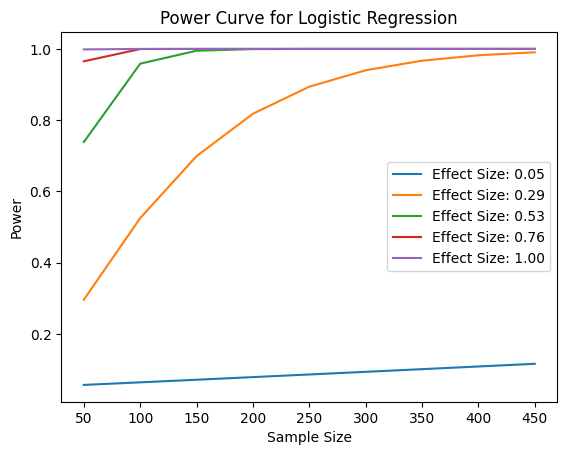

In [123]:
# Define the desired significance level, effect sizes, and sample sizes
alpha = 0.05
effect_sizes = np.linspace(0.05, 1, num=5)
nobs = np.arange(50, 500, step=50)

# Calculate the power for each combination of effect size and sample size
powers = np.zeros((len(effect_sizes), len(nobs)))
for i, effect_size in enumerate(effect_sizes):
    for j, n_sample in enumerate(nobs):
        X_train_resampled = sm.add_constant(X_train_resampled)
        lr_model = sm.Logit(y_train_resampled, X_train_resampled).fit(disp=False)
        power = TTestIndPower().solve_power(
            effect_size=effect_size,
            nobs1=n_sample,
            alpha=alpha,
            ratio=1,
            alternative='two-sided'
        )
        powers[i, j] = power

# Plot the power curve
fig, ax = plt.subplots()
for i, effect_size in enumerate(effect_sizes):
    ax.plot(nobs, powers[i], label=f'Effect Size: {effect_size:.2f}')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Power')
ax.set_title('Power Curve for Logistic Regression')
ax.legend()
plt.show()


# Final - Research Question 2

## Data Preprocessing

In [124]:
# Check which attribute has null value
print(df.isnull().sum())

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             468
PersonID                               0
Perceived_Race                         0
Sex                                    0
Age_group__at_arrest_                  0
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57448
SearchReason_AssistEscape          57448
SearchReason_PossessWeapons        57448
SearchReason_PossessEvidence       57448
ItemsFound                         57448
ObjectId        

In [125]:
# Drop records with null age group since there are only a few null age group records
df = df.dropna(subset=['Age_group__at_arrest_'])

In [126]:
# Show the total number of records
print(df.shape[0])

65248


In [127]:
# Create a column 'Age' and combine values with the same meaning
df['Age'] = np.where(df['Age_group__at_arrest_'] == 'Aged 17 years and under', '17 and younger',
         np.where(df['Age_group__at_arrest_'] == 'Aged 17 years and younger', '17 and younger',
         np.where(df['Age_group__at_arrest_'] == 'Aged 18 to 24 years', '18 - 24',
         np.where(df['Age_group__at_arrest_'] == 'Aged 25 to 34 years', '25 - 34',
         np.where(df['Age_group__at_arrest_'] == 'Aged 35 to 44 years', '35 - 44',
         np.where(df['Age_group__at_arrest_'] == 'Aged 45 to 54 years', '45 - 54',
         np.where(df['Age_group__at_arrest_'] == 'Aged 55 to 64 years', '55 - 64',
         np.where(df['Age_group__at_arrest_'] == 'Aged 65 and older', '65 and older',
         np.where(df['Age_group__at_arrest_'] == 'Aged 65 years and older', '65 and older','')))))))))

In [128]:
# Create a column 'Age_Dummy' and combine values with the same meaning
df['Age_Dummy'] = np.where(df['Age_group__at_arrest_'] == 'Aged 17 years and under', 1,
         np.where(df['Age_group__at_arrest_'] == 'Aged 17 years and younger', 1,
         np.where(df['Age_group__at_arrest_'] == 'Aged 18 to 24 years', 2,
         np.where(df['Age_group__at_arrest_'] == 'Aged 25 to 34 years', 3,
         np.where(df['Age_group__at_arrest_'] == 'Aged 35 to 44 years', 4,
         np.where(df['Age_group__at_arrest_'] == 'Aged 45 to 54 years', 5,
         np.where(df['Age_group__at_arrest_'] == 'Aged 55 to 64 years', 6,
         np.where(df['Age_group__at_arrest_'] == 'Aged 65 and older', 7,
         np.where(df['Age_group__at_arrest_'] == 'Aged 65 years and older', 7,'')))))))))

In [129]:
df['Age_Dummy'] = pd.to_numeric(df['Age_Dummy'])

In [130]:
print(len(df[df['Sex'] == 'U']))

9


In [131]:
# Drop Sex = U
df = df[df['Sex'] != 'U']

In [132]:
# Check the dataset
df.head()

Arrest_Year Arrest_Month  EventID   ArrestID  PersonID     Perceived_Race  \
0         2020    July-Sept  1005907  6017884.0    326622              White   
1         2020    July-Sept  1014562  6056669.0    326622              White   
2         2020      Oct-Dec  1029922  6057065.0    326622  Unknown or Legacy   
3         2021      Jan-Mar  1052190  6029059.0    327535              Black   
4         2021      Jan-Mar  1015512  6040372.0    327535        South Asian   

  Sex Age_group__at_arrest_ Youth_at_arrest__under_18_years ArrestLocDiv  ...  \
0   M   Aged 35 to 44 years                     Not a youth           54  ...   
1   M   Aged 35 to 44 years                     Not a youth           54  ...   
2   M   Aged 35 to 44 years                     Not a youth           54  ...   
3   M   Aged 25 to 34 years                     Not a youth           XX  ...   
4   M   Aged 25 to 34 years                     Not a youth           XX  ...   

   SearchReason_CauseInjury  SearchReason_AssistEscape  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

  SearchReason_PossessWeapons  SearchReason_PossessEvidence  ItemsFound  \
0                         NaN                           NaN         NaN   
1                         NaN                           NaN         NaN   
2                         NaN                           NaN         NaN   
3                         NaN                           NaN         NaN   
4                         NaN                           NaN         NaN   

   ObjectId      Age        Youth  POC  Age_Dummy  
0         1  35 - 44  Not a youth   No          4  
1         2  35 - 44  Not a youth   No          4  
2         3  35 - 44  Not a youth  Yes          4  
3         4  25 - 34  Not a youth  Yes          3  
4         5  25 - 34  Not a youth  Yes          3  

[5 rows x 29 columns]

## Visualization

Sex & Strip Search

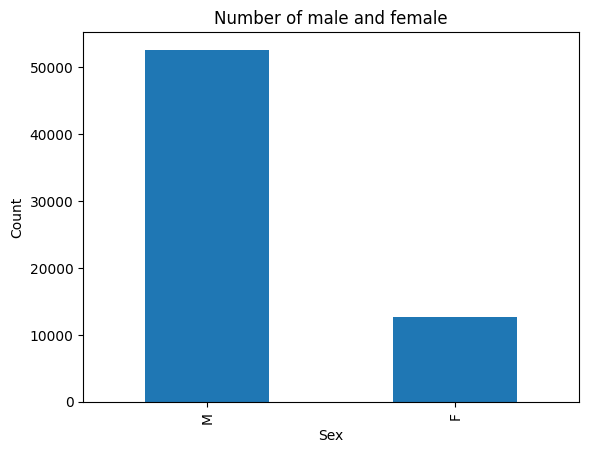

In [133]:
df['Sex'].value_counts().plot(kind='bar')

plt.title('Number of male and female')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()

In [134]:
tablef1 = pd.crosstab(df['Sex'], df['StripSearch'])
tablef1

StripSearch      0     1
Sex                     
F            11325  1283
M            46114  6517

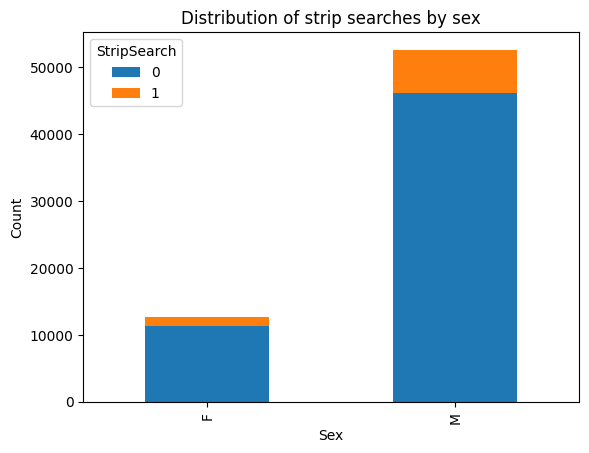

In [135]:
plotf1 = tablef1.plot(kind='bar', stacked=True)
plotf1.set_title('Distribution of strip searches by sex')
plotf1.set_ylabel('Count')
plt.show()

In [136]:
tablef2 = pd.crosstab(df['Sex'], df['StripSearch']).apply(lambda r: r/r.sum() * 100, axis=1)
tablef2

StripSearch          0          1
Sex                              
F            89.823921  10.176079
M            87.617564  12.382436

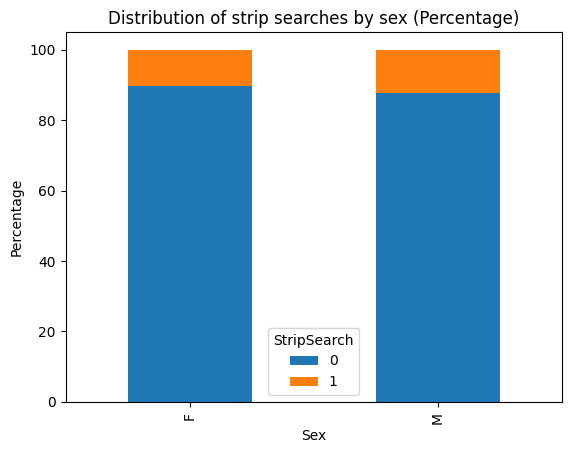

In [137]:
plotf2 = tablef2.plot(kind='bar', stacked=True)
plotf2.set_title('Distribution of strip searches by sex (Percentage)')
plotf2.set_ylabel('Percentage')
plt.show()

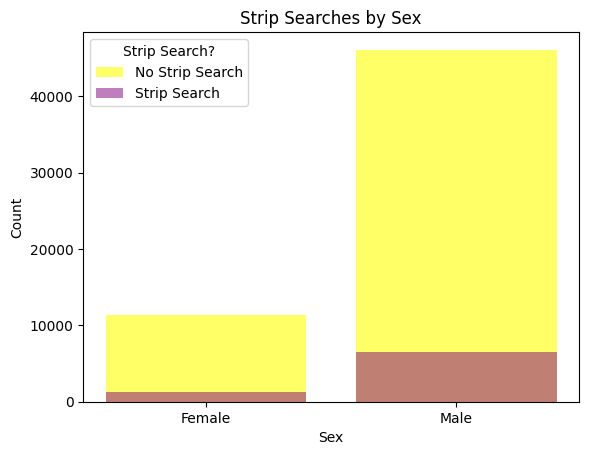

In [138]:
fig, ax = plt.subplots()

sex_group = ['Female', 'Male']

strip_count2 = df[df['StripSearch'] == 1]['Sex'].value_counts().sort_index()
not_strip_count2 = df[df['StripSearch'] == 0]['Sex'].value_counts().sort_index()

ax.bar(sex_group, not_strip_count2, alpha=0.6, color='yellow', label='No Strip Search')
ax.bar(sex_group, strip_count2, alpha=0.5, color='purple', label='Strip Search')

ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Strip Searches by Sex')

ax.legend(title='Strip Search?')

Age & Strip Search

In [139]:
tablef3 = pd.crosstab(df['Age'], df['StripSearch']).apply(lambda r: r/r.sum() * 100, axis=1)
tablef3

StripSearch             0          1
Age                                 
17 and younger  90.795529   9.204471
18 - 24         86.561068  13.438932
25 - 34         86.769481  13.230519
35 - 44         87.087438  12.912562
45 - 54         90.016547   9.983453
55 - 64         92.109852   7.890148
65 and older    97.276853   2.723147

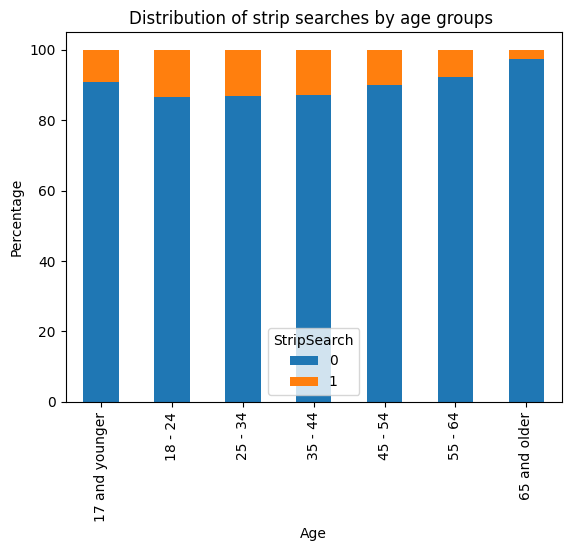

In [140]:
plotf3 = tablef3.plot(kind='bar', stacked=True)
plotf3.set_title('Distribution of strip searches by age groups ')
plotf3.set_ylabel('Percentage')
plt.show()

Strip Search & Age & Sex

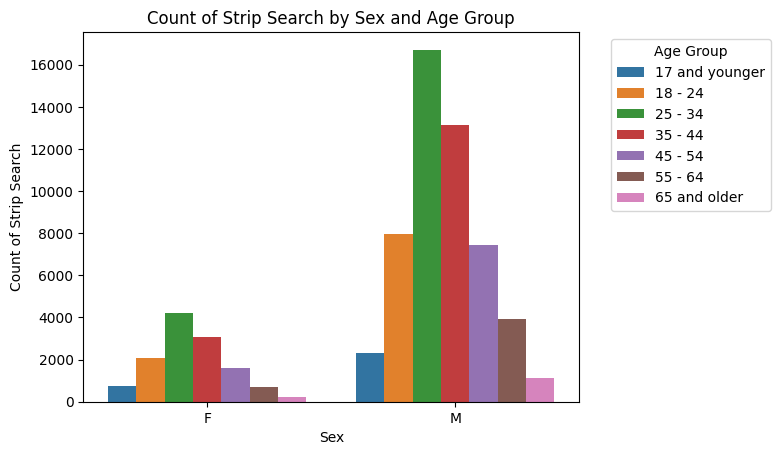

In [141]:
group1 = df.groupby(['Sex', 'Age'])['StripSearch'].count().reset_index()

# Create a bar plot using Seaborn
sns.barplot(x='Sex', y='StripSearch', hue='Age', data=group1)

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count of Strip Search')
plt.title('Count of Strip Search by Sex and Age Group')
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

## T-test

In [142]:
group_F = df.loc[df['Sex'] == 'F', 'StripSearch']
group_M = df.loc[df['Sex'] == 'M', 'StripSearch']

# Perform t-test
t_statistic, p_value = ttest_ind(group_F, group_M, equal_var=False)

# Print results
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -7.230350921232594
p-value: 4.987599476516128e-13


In [143]:
group_youthf2 = df.loc[df['Age'] == '17 and younger', 'StripSearch']
group_notyouthf2 = df.loc[df['Age'] != '17 and younger', 'StripSearch']

# Perform t-test
t_statistic, p_value = ttest_ind(group_youthf2, group_notyouthf2, equal_var=False)

# Print results
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -5.341889452210711
p-value: 9.79742439110517e-08


In [144]:
group_elderly = df.loc[df['Age'] == '65 and older', 'StripSearch']
group_notelderly = df.loc[df['Age'] != '65 and older', 'StripSearch']

# Perform t-test
t_statistic, p_value = ttest_ind(group_elderly, group_notelderly, equal_var=False)

# Print results
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -20.219637211457943
p-value: 7.166772339656953e-81


## ANCOVA & Interaction Plot

In [145]:
!pip install pingouin
from pingouin import ancova

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=34d5b7c82b2d349bea838f97415bf5b74d2b9919603c6ea686a84487d17ad0c9
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [146]:
# Alternative 1
ancova(data=df, dv='StripSearch', covar='Age_Dummy', between='Sex')

Source           SS     DF           F         p-unc       np2
0        Sex     5.730399      1   54.584611  1.506684e-13  0.000836
1  Age_Dummy    13.875070      1  132.166248  1.472613e-30  0.002022
2   Residual  6848.602473  65236         NaN           NaN       NaN

In [147]:
# Alternative 2
# Perform the ANCOVA
modelf1 = ols('StripSearch ~ Sex + Age_Dummy', data=df).fit()

# Compute ANCOVA result
ancova_resultf1 = sm.stats.anova_lm(modelf1, typ=2)

# Show the test result
print(ancova_resultf1)

# Print the summary of the model
print(modelf1.summary())

                sum_sq       df           F        PR(>F)
Sex           5.730399      1.0   54.584611  1.506684e-13
Age_Dummy    13.875070      1.0  132.166248  1.472613e-30
Residual   6848.602473  65236.0         NaN           NaN
                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     89.67
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           1.29e-39
Time:                        16:48:13   Log-Likelihood:                -19045.
No. Observations:               65239   AIC:                         3.810e+04
Df Residuals:                   65236   BIC:                         3.812e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                    

Interaction Plot

In [148]:
from statsmodels.graphics.factorplots import interaction_plot

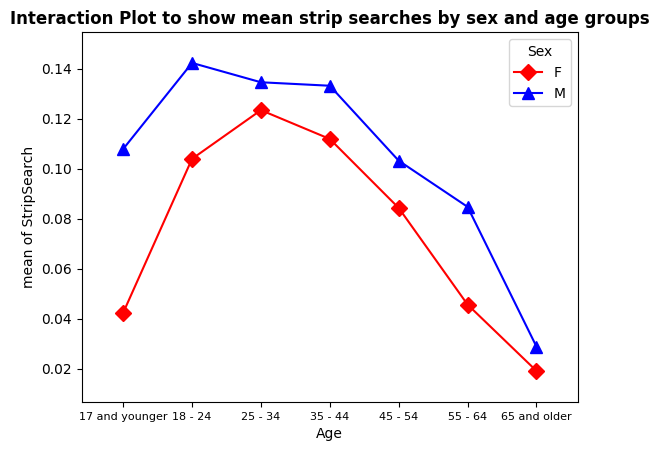

In [149]:
fig = interaction_plot(df.Age, df.Sex, df.StripSearch,
             colors=['red','blue'], markers=['D','^'], ms=8)

# Access the Axes object
ax = fig.axes[0]

# Set the font size of the x-axis labels
ax.tick_params(axis='x', labelsize=8)

plt.title('Interaction Plot to show mean strip searches by sex and age groups', fontweight='bold')
plt.show()

# Final - Power Analysis

In [150]:
#code for Cohen's D 

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [151]:
#creating two different datasets one with male strip search and the other female strip search
female = df[df['Sex']=='F']['StripSearch']
male = df[df['Sex']=='M']['StripSearch']

In [152]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(male,female)
alpha = 0.05
power = 0.8
ratio_ =len(male)/len(female) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for strip search:',effect_size)

Effect size (Cohen's D) for strip search: 0.06802717106766784


In [153]:
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for female') 
print('Actual size of female:', len(female))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for male')
print('Actual size of male:', len(male))

Sample Size of nobs1: 2102.733 needed for female
Actual size of female: 12608
Sample Size of nobs2: 8777.676 needed for male
Actual size of male: 52631


In [154]:
#Find the power of a proposed sample size 

from statsmodels.stats.power import TTestPower

power = TTestPower()
n_test = power.solve_power(nobs=12609, effect_size = 0.8, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 1.000


In [155]:
#Find the power of a proposed sample size 

from statsmodels.stats.power import TTestPower

power = TTestPower()
n_test = power.solve_power(nobs=52634, effect_size = 0.8, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 1.000


/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning:

invalid value encountered in _nct_sf

/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning:

invalid value encountered in _nct_cdf



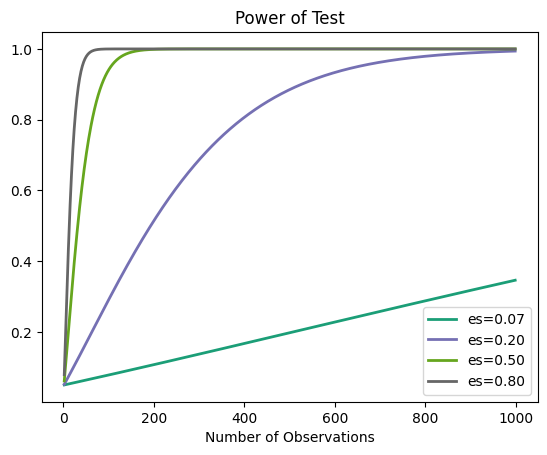

In [156]:
effect_sizes = np.array([0.07, 0.2, 0.5, 0.8])
sample_sizes = np.array(range(2, 1000))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()